In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os
from scipy.interpolate import interp1d

# Import the MFI library 
import MFI_lib1D as lib1
import MFI_class1D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)
# path_figures = "/home/ucecabj/Pictures/MFI_figures/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})



The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class1D


#### Common grid from -6 to 6 with 501 grid-points

In [2]:
#### GRID ALL ##################
grid = np.linspace(-6, 6, 501)


#### Define NEW FES

In [3]:
### Define FES 0 - 19

for _surf_0_4 in [1]:
    #### SURFSCE 0 ##################           
    y0_string = "2/3*(3*(0.5*x)^4-19*(0.5*x)^2)"
    y0 = 2/3*(3*(0.5*grid)**4 - 19*(0.5*grid)**2)
    y0 = y0 - np.min(y0)

    # #### SURFSCE 1 ##################
    y1_string = "5/6*(-30*exp(-0.33*((1.5*x)+6.0)^2)-10*exp(-((1.5*x)+1.9)^2)-32.5*exp(-0.4*((1.5*x)-1.9)^2)-30*exp(-0.2*((1.5*x)-5.8)^2)+exp(-(1.5*x)-7.5)^2+exp((1.5*x)-7.5)^2)"
    y1 = 5/6*(- 30*np.exp(-0.33*((1.5*grid) + 6.0)**2) - 10*np.exp(-((1.5*grid) + 1.9)**2) - 32.5*np.exp(-0.4*((1.5*grid) - 1.9)**2) - 30*np.exp(-0.2*((1.5*grid) - 5.8)**2) + np.exp(-(1.5*grid)-7.5)**2 + np.exp((1.5*grid)-7.5)**2)
    y1 = y1 - np.min(y1)

    # #### SURFSCE 2 ##################
    y2_string = "7/6*(-20*exp(-0.25*(x+3.5)^4)-20*exp(-0.25*(x-3.5)^4)+5*sin(4*x)+10*exp(-5*(x+4.5)^2)+exp(-x-4.5)^2+exp(x-4.4)^2)"
    y2 = 7/6*(- 20*np.exp(-0.25*(grid + 3.5)**4) - 20*np.exp(-0.25*(grid - 3.5)**4) + 5*np.sin(4*grid) + 10*np.exp(-5*(grid + 4.5)**2) + np.exp(-grid-4.5)**2 + np.exp(grid-4.4)**2)
    y2 = y2 - np.min(y2)

    # #### SURFSCE 3 ##################
    y3_string = "4/3*(-14*exp(-0.25*(x+3.5)^4)-25*exp(-0.25*(x-3.5)^4)-10*exp(-(x+0.5)^2)-2*sin(-8*x)+exp(-x-4.5)^2+exp(x-4.5)^2)"
    y3 = 4/3*(- 14*np.exp(-0.25*(grid + 3.5)**4) - 25*np.exp(-0.25*(grid - 3.5)**4) - 10*np.exp(-(grid + 0.5)**2) - 2*np.sin(-8*grid) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2)
    y3 = y3 - np.min(y3)

    # #### SURFSCE 4 ##################
    y4_string = "1.5*(-22*exp(-1.6*(x-1)^2)-10*exp(-4.0*(x+0.5)^2)-30*exp(-0.332*(x-3.2)^2)-30*exp(-0.344*(x+3.2)^2)+2*sin(-8*(x-1.1))^3)+exp(-x-4.5)^2+exp(x-4.5)^2"
    y4 = 1.5*(-22*np.exp(-1.6*(grid-1)**2) - 10*np.exp(-4.0*(grid+0.5)**2) - 30*np.exp(-0.332*(grid-3.2)**2) - 30*np.exp(-0.344*(grid+3.2)**2) + 2*np.sin(-8*(grid-1.1))**3)+ np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2 
    y4 = y4 - np.min(y4)

for _surf_5_9 in [1]:
    # #### SURFSCE 5 ##################
    y5_string = "0.89*(22*exp(-4.7*(x-3.6)^2)+11*exp(-2.0*(x-0.09)^2)+29*exp(-3.8*(x+3.0)^2)-11*exp(-5.0*(x-3.2)^4)-28*exp(-2.2*(x+0.13)^2)-6*exp(-4.4*(x+3.1)^2)-12.4*exp(-1.6*(x-0.14)^6)-51*exp(-0.21*(x-3.2)^4)-52*exp(-0.361*(x+3.7)^6))+exp(-x-4.5)^2+exp(x-4.5)^2"
    y5 = 0.89*(22*np.exp(-4.7*(grid-3.6)**2) + 11*np.exp(-2.0*(grid-0.09)**2) + 29*np.exp(-3.8*(grid+3.0)**2) - 11*np.exp(-5.0*(grid-3.2)**4) - 28*np.exp(-2.2*(grid+0.13)**2) - 6*np.exp(-4.4*(grid+3.1)**2) - 12.4*np.exp(-1.6*(grid-0.14)**6) - 51*np.exp(-0.21*(grid-3.2)**4) - 52*np.exp(-0.361*(grid+3.7)**6)) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y5 = y5 - np.min(y5)

    # #### SURFSCE 6 ##################
    y6_string = "1.8*(-28*exp(-0.1*(x+3.5)^4)+15*exp(-1.5*(x+3.3)^2)-15*exp(-3.5*x^2)-28*exp(-0.1*(x-3.5)^6)+exp(-x-4.5)^2+exp(x-4.4)^2)"
    y6 = 1.8*(- 28*np.exp(-0.1*(grid + 3.5)**4) + 15*np.exp(-1.5*(grid + 3.3)**2) - 15*np.exp(-3.5*grid**2) - 28*np.exp(-0.1*(grid - 3.5)**6) + np.exp(-grid-4.5)**2 + np.exp(grid-4.4)**2)
    y6 = y6 - np.min(y6)
    
    # #### SURFSCE 6 ##################
    y7_string = "0.88*(12*exp(-2.2*(x-3.0)^2)+1*exp(-4.8*(x+0.02)^4)+18*exp(-3.0*(x+3.5)^2)-17*exp(-2.5*(x-3.3)^4)-19*exp(-3.9*(x+0.29)^4)-11*exp(-3.0*(x+3.4)^2)-37*exp(-0.208*(x-3.6)^2)-53*exp(-0.386*(x+3.7)^6)+3*sin(-4*(x-1.3))^6)+exp(-x-4.5)^2+exp(x-4.5)^2"
    y7 = 0.88*(12*np.exp(-2.2*(grid-3.0)**2) + 1*np.exp(-4.8*(grid+0.02)**4) + 18*np.exp(-3.0*(grid+3.5)**2) - 17*np.exp(-2.5*(grid-3.3)**4) - 19*np.exp(-3.9*(grid+0.29)**4) - 11*np.exp(-3.0*(grid+3.4)**2) - 37*np.exp(-0.208*(grid-3.6)**2) - 53*np.exp(-0.386*(grid+3.7)**6) + 3*np.sin(-4*(grid-1.3))**6) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y7 = y7 - np.min(y7)    

    # #### SURFSCE 8 ##################
    y8_string = "0.65*(9*exp(-2.9*(x-3.3)^2)+21*exp(-3.3*(x+0.21)^4)+28*exp(-3.5*(x+2.8)^4)-58*exp(-0.278*(x-3.3)^4)-29*exp(-0.188*(x+3.7)^6)+3*sin(-8*(x-1.0))^2)+exp(-x-4.5)^2+exp(x-4.5)^2"
    y8 = 0.65*(9*np.exp(-2.9*(grid-3.3)**2) + 21*np.exp(-3.3*(grid+0.21)**4) + 28*np.exp(-3.5*(grid+2.8)**4) - 58*np.exp(-0.278*(grid-3.3)**4) - 29*np.exp(-0.188*(grid+3.7)**6) + 3*np.sin(-8*(grid-1.0))**2) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y8 = y8 - np.min(y8)

    # #### SURFSCE 9 ##################
    y9_string = "0.83*(5*exp(-4.6*(x-2.7)^2)+3*exp(-3.3*(x-0.22)^2)+21*exp(-3.6*(x+2.9)^4)-15*exp(-4.9*(x-3.4)^4)-16*exp(-4.3*(x-0.0)^2)-21*exp(-4.0*(x+2.9)^4)-59*exp(-0.197*(x-3.0)^2)-53*exp(-0.274*(x+2.8)^4)+3*sin(-8*(x-1.9))^6)+exp(-x-4.5)^2+exp(x-4.5)^2"
    y9 = 0.83*(5*np.exp(-4.6*(grid-2.7)**2) + 3*np.exp(-3.3*(grid-0.22)**2) + 21*np.exp(-3.6*(grid+2.9)**4) - 15*np.exp(-4.9*(grid-3.4)**4) - 16*np.exp(-4.3*(grid-0.0)**2) - 21*np.exp(-4.0*(grid+2.9)**4) - 59*np.exp(-0.197*(grid-3.0)**2) - 53*np.exp(-0.274*(grid+2.8)**4) + 3*np.sin(-8*(grid-1.9))**6) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y9 = y9 - np.min(y9)

for _surf_10_14 in [1]:
    # #### SURFSCE 10 ##################
    y10_string = "1.3*(11*exp(-3.3*(x-2.8)^4)+21*exp(-4.1*(x-0.13)^2)+16*exp(-4.3*(x+2.7)^2)-20*exp(-4.4*(x-3.4)^2)-28*exp(-3.4*(x+0.13)^4)-8*exp(-3.8*(x+3.5)^4)-10.0*exp(-1.2*(x+0.26)^6)-32*exp(-0.3*(x-3.2)^6)-38*exp(-0.304*(x+3.3)^6)+2*sin(-2*(x-1.1))^1)+exp(-x-4.5)^2+exp(x-4.5)^2"
    y10 = 1.3*(11*np.exp(-3.3*(grid-2.8)**4) + 21*np.exp(-4.1*(grid-0.13)**2) + 16*np.exp(-4.3*(grid+2.7)**2) - 20*np.exp(-4.4*(grid-3.4)**2) - 28*np.exp(-3.4*(grid+0.13)**4) - 8*np.exp(-3.8*(grid+3.5)**4) - 10.0*np.exp(-1.2*(grid+0.26)**6) - 32*np.exp(-0.3*(grid-3.2)**6) - 38*np.exp(-0.304*(grid+3.3)**6) + 2*np.sin(-2*(grid-1.1))**1) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y10 = y10 - np.min(y10)
    
    # #### SURFSCE 11 ##################
    y11_string = "1.53*(21*exp(-4.3*(x-2.7)^2)+1*exp(-3.6*(x-0.04)^4)+29*exp(-3.5*(x+3.7)^4)-15*exp(-2.3*(x-2.8)^2)-21*exp(-4.8*(x-0.23)^4)-17*exp(-4.9*(x+3.0)^2)-30*exp(-0.366*(x-3.3)^6)-38*exp(-0.187*(x+3.4)^4))+exp(-x-4.5)^2+exp(x-4.5)^2"
    y11 = 1.53*(21*np.exp(-4.3*(grid-2.7)**2) + 1*np.exp(-3.6*(grid-0.04)**4) + 29*np.exp(-3.5*(grid+3.7)**4) - 15*np.exp(-2.3*(grid-2.8)**2) - 21*np.exp(-4.8*(grid-0.23)**4) - 17*np.exp(-4.9*(grid+3.0)**2) - 30*np.exp(-0.366*(grid-3.3)**6) - 38*np.exp(-0.187*(grid+3.4)**4) ) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y11 = y11 - np.min(y11)

    # #### SURFSCE 12 ##################
    y12_string = "2.3*(-20*exp(-0.25*((2.8*x)+11)^2)-28*exp(-0.15*((2.8*x)+7.5)^4)-28*exp(-0.15*((2.8*x)+4.5)^4)-10*exp(-0.8*(2.8*x)^2)-7*exp(-0.8*((2.8*x)-3.0)^2)-23*exp(-0.3*((2.8*x)-8.0)^2)-15*exp(-0.3*((2.8*x)-12)^2)+exp(-(2.8*x)-15)^2+exp((2.8*x)-15)^2)"
    y12 = 2.3*( - 20*np.exp(-0.25*((2.8*grid) + 11.0)**2) - 28*np.exp(-0.15*((2.8*grid) + 7.5)**4) - 28*np.exp(-0.15*((2.8*grid) + 4.5)**4) - 10*np.exp(-0.8*(2.8*grid)**2) - 7*np.exp(-0.8*((2.8*grid) - 3.0)**2) - 23*np.exp(-0.3*((2.8*grid) - 8.0)**2) - 15*np.exp(-0.3*((2.8*grid) - 12.0)**2) + np.exp(-(2.8*grid)-15)**2 + np.exp((2.8*grid)-15)**2)
    y12 = y12 - np.min(y12)
    
    # #### SURFSCE 13 ##################
    y13_string = "1.81*(29*exp(-1.4*(x-3.4)^4)+5*exp(-3.8*(x-0.07)^4)+0*exp(-3.8*(x+2.9)^4)-22*exp(-2.5*(x-2.9)^4)-5*exp(-3.7*(x-0.05)^4)-12*exp(-3.2*(x+3.1)^4)-8.6*exp(-2.3*(x-0.22)^6)-40*exp(-0.35*(x-3.4)^4)-30*exp(-0.212*(x+3.0)^4)+2*sin(-8*(x-0.2))^2)+exp(-x-4.5)^2+exp(x-4.5)^2"
    y13 = 1.81*(29*np.exp(-1.4*(grid-3.4)**4) + 5*np.exp(-3.8*(grid-0.07)**4) + 0*np.exp(-3.8*(grid+2.9)**4) - 22*np.exp(-2.5*(grid-2.9)**4) - 5*np.exp(-3.7*(grid-0.05)**4) - 12*np.exp(-3.2*(grid+3.1)**4) - 8.6*np.exp(-2.3*(grid-0.22)**6) - 40*np.exp(-0.35*(grid-3.4)**4) - 30*np.exp(-0.212*(grid+3.0)**4) + 2*np.sin(-8*(grid-0.2))**2) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y13 = y13 - np.min(y13)
    
    # #### SURFSCE 14 ##################
    y14_string = "1.54*(22*exp(-1.6*(x-2.8)^2)+10*exp(-4.0*(x-0.19)^2)+23*exp(-3.2*(x+3.2)^4)-41*exp(-0.332*(x-3.2)^2)-47*exp(-0.344*(x+3.2)^4)+2*sin(-8*(x-1.1))^3)+exp(-x-4.5)^2+exp(x-4.5)^2"
    y14 = 1.54*(22*np.exp(-1.6*(grid-2.8)**2) + 10*np.exp(-4.0*(grid-0.19)**2) + 23*np.exp(-3.2*(grid+3.2)**4) - 41*np.exp(-0.332*(grid-3.2)**2) - 47*np.exp(-0.344*(grid+3.2)**4) + 2*np.sin(-8*(grid-1.1))**3) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y14 = y14 - np.min(y14)    

for _surf_15_19 in [1]:
    
    # #### SURFSCE 15 ##################
    y15_string = "1.39*(-25*exp(-1.9*(x-3.4)^2)-12*exp(-3.2*(x-0.17)^2)-16*exp(-3.7*(x+3.5)^4)-7.6*exp(-2.2*(x-0.11)^2)-40*exp(-0.24*(x-3.4)^4)-44*exp(-0.227*(x+3.5)^4))+exp(-x-4.5)^2+exp(x-4.5)^2"
    y15 = 1.39*(-25*np.exp(-1.9*(grid-3.4)**2) - 12*np.exp(-3.2*(grid-0.17)**2) - 16*np.exp(-3.7*(grid+3.5)**4) - 7.6*np.exp(-2.2*(grid-0.11)**2) - 40*np.exp(-0.24*(grid-3.4)**4) - 44*np.exp(-0.227*(grid+3.5)**4) ) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y15 = y15 - np.min(y15)
        
    # #### SURFSCE 16 ##################
    y16_string = "1.2*(10*exp(-4.1*(x-3.6)^2)+28*exp(-3.3*(x-0.13)^2)+6*exp(-4.6*(x+2.7)^2)-12*exp(-4.2*(x-3.1)^2)-3*exp(-4.4*(x-0.07)^2)-13*exp(-4.7*(x+3.7)^4)-23*exp(-0.227*(x-3.3)^2)-57*exp(-0.155*(x+2.6)^2)+2*sin(-4*(x-1.6))^2)+exp(-x-4.5)^2+exp(x-4.5)^2"
    y16 = 1.2*(10*np.exp(-4.1*(grid-3.6)**2) + 28*np.exp(-3.3*(grid-0.13)**2) + 6*np.exp(-4.6*(grid+2.7)**2) - 12*np.exp(-4.2*(grid-3.1)**2) - 3*np.exp(-4.4*(grid-0.07)**2) - 13*np.exp(-4.7*(grid+3.7)**4) - 23*np.exp(-0.227*(grid-3.3)**2) - 57*np.exp(-0.155*(grid+2.6)**2) + 2*np.sin(-4*(grid-1.6))**2) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y16 = y16 - np.min(y16)

    # # #### SURFSCE 17 ##################
    y17_string = "3.5*(-15*exp(-0.45*((2.8*x)-14.0)^2)-28*exp(-0.35*((2.8*x)-10.0)^2)-23*exp(-0.15*((2.8*x)-6.0)^2)-28*exp(-0.3*(2.8*x)^2)-15*exp(-0.6*((2.8*x)+4.0)^2)-23*exp(-0.4*((2.8*x)+8.0)^2)-32*exp(-0.2*((2.8*x)+12.0)^2)+exp(-(2.8*x)-15)^2+exp((2.8*x)-15)^2)"
    y17 = 3.5*(-15*np.exp(-0.45*((2.8*grid) - 14.0)**2) - 28*np.exp(-0.35*((2.8*grid) - 10.0)**2) - 23*np.exp(-0.15*((2.8*grid) - 6.0)**2) - 28*np.exp(-0.3*(2.8*grid)**2) - 15*np.exp(-0.6*((2.8*grid) + 4.0)**2) - 23*np.exp(-0.4*((2.8*grid) + 8.0)**2) - 32*np.exp(-0.2*((2.8*grid) + 12.0)**2) + np.exp(-(2.8*grid)-15)**2 + np.exp((2.8*grid)-15)**2)
    y17 = y17 - np.min(y17)

    # #### SURFSCE 18 ##################
    y18_string = "1.69*(5*exp(-1.6*(x-3.6)^2)+26*exp(-4.4*(x+0.01)^4)+21*exp(-4.6*(x+3.2)^4)-42*exp(-0.249*(x-2.5)^2)-44*exp(-0.281*(x+2.5)^2)+3*sin(-8*(x-2.0))^1)+exp(-x-4.5)^2+exp(x-4.5)^2"
    y18 = 1.69*(5*np.exp(-1.6*(grid-3.6)**2) + 26*np.exp(-4.4*(grid+0.01)**4) + 21*np.exp(-4.6*(grid+3.2)**4) - 42*np.exp(-0.249*(grid-2.5)**2) - 44*np.exp(-0.281*(grid+2.5)**2) + 3*np.sin(-8*(grid-2.0))**1) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y18 = y18 - np.min(y18)

    # #### SURFSCE 19 ##################
    y19_string = "1.46*(21*exp(-4.3*(x-3.4)^2)+15*exp(-4.5*(x+0.14)^4)+28*exp(-3.7*(x+3.7)^4)-20*exp(-2.4*(x-3.6)^2)-15*exp(-3.6*(x-0.3)^2)-24*exp(-3.4*(x+2.7)^2)-8.9*exp(-0.5*(x-0.06)^2)-23*exp(-0.3*(x-3.7)^4)-22*exp(-0.337*(x+2.8)^6)+3*sin(-8*(x-0.4))^7)+exp(-x-4.5)^2+exp(x-4.5)^2"
    y19 = 1.46*(21*np.exp(-4.3*(grid-3.4)**2) + 15*np.exp(-4.5*(grid+0.14)**4) + 28*np.exp(-3.7*(grid+3.7)**4) - 20*np.exp(-2.4*(grid-3.6)**2) - 15*np.exp(-3.6*(grid-0.3)**2) - 24*np.exp(-3.4*(grid+2.7)**2) - 8.9*np.exp(-0.5*(grid-0.06)**2) - 23*np.exp(-0.3*(grid-3.7)**4) - 22*np.exp(-0.337*(grid+2.8)**6) + 3*np.sin(-8*(grid-0.4))**7) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y19 = y19 - np.min(y19)

FES_cutoff_list = [30, 40, 50, 50, 50, 70, 60, 60, 70, 80, 80, 90, 80, 90, 80, 100, 100, 100, 110, 110]


In [4]:
# ## save surfaces into path_notebook + "/fes_list_1D"

# y_list = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19]
# y_string_list = [y0_string, y1_string, y2_string, y3_string, y4_string, y5_string, y6_string, y7_string, y8_string, y9_string, y10_string, y11_string, y12_string, y13_string, y14_string, y15_string, y16_string, y17_string, y18_string, y19_string]

# # 
# lib1.save_pkl([grid, y_list, y_string_list], path_notebook + "/fes_list_1D")


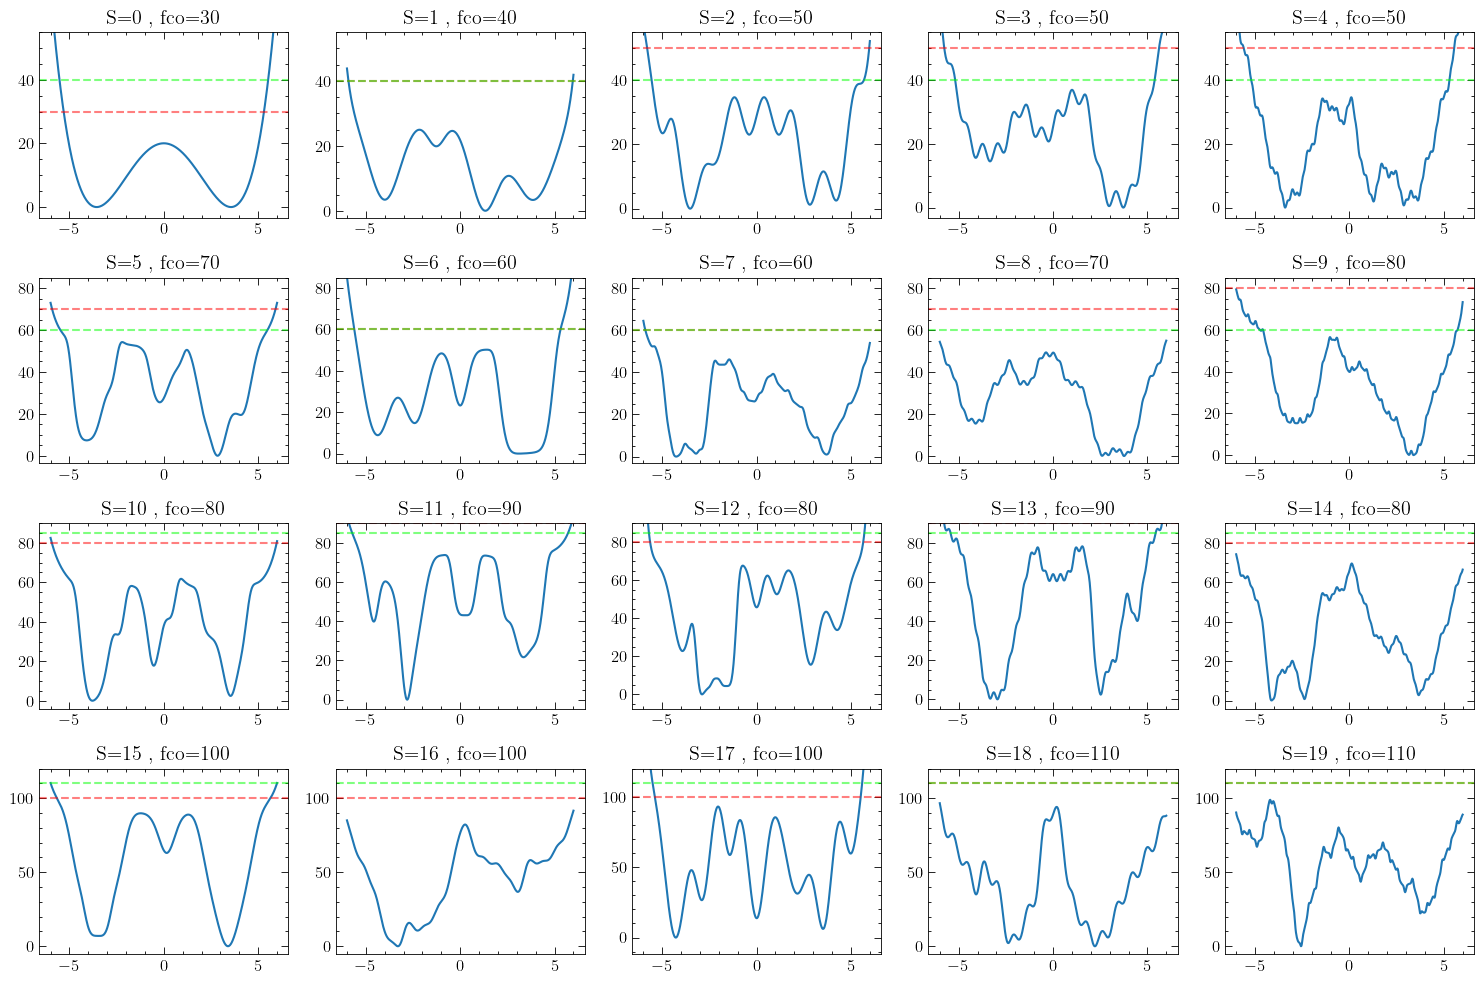

In [118]:
### plot all surfaces in new order

y_list = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19]


ylim = [55]*5 + [85]*5 + [90]*5 + [120]*5
fcoa = [40]*5 + [60]*5 + [85]*5 + [110]*5


plt.figure(figsize=(15, 10))
for n_surf in range(20):
    plt.subplot(4, 5, n_surf+1)
    plt.plot(grid, y_list[n_surf])
    plt.axhline(FES_cutoff_list[n_surf], color='red', linestyle='--', alpha=0.5)
    plt.axhline(fcoa[n_surf], color='lime', linestyle='--', alpha=0.5); 
    plt.title(f"S={n_surf} , fco={FES_cutoff_list[n_surf]}"); plt.ylim(top=ylim[n_surf])
plt.tight_layout(); plt.show()

#### Make random fes

In [41]:
def make_rand_surf(max_barrier=50, save_fes_name=None):
    
    
    y_rand = np.zeros_like(grid)
    y_rand_string = ""
    
    r = random.randint(0,1)
    # r = 1
    
    if r == 0: #make two deep wells  ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        #paremeters for well 1: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(20,60)
        width = random.randint(100, 400) / 1000
        position = random.randint(23, 37) / 10
        exponent = int(random.randint(1,3) * 2)
        
        y_rand += - height*np.exp(-width*(grid + position)**exponent)
        y_rand_string = "-" + str(height) + "*exp(-" + str(width) + "*(x+" + str(position) + ")^" + str(exponent) + ")" + y_rand_string
        
        #paremeters for well 2: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(20,60)
        width = random.randint(100, 400) / 1000
        position = random.randint(23, 37) / 10
        exponent = int(random.randint(1,3) * 2)
        
        y_rand += - height*np.exp(-width*(grid - position)**exponent)
        y_rand_string = "-" + str(height) + "*exp(-" + str(width) + "*(x-" + str(position) + ")^" + str(exponent) + ")" + y_rand_string

    else: #make two deep wells and less deep well in the middle ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        #paremeters for well 1: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(20,60)
        width = random.randint(100, 400) / 1000
        position = random.randint(27, 37) / 10
        exponent = int(random.randint(1,3) * 2)
        
        y_rand += - height*np.exp(-width*(grid + position)**exponent)
        y_rand_string = "-" + str(height) + "*exp(-" + str(width) + "*(x+" + str(position) + ")^" + str(exponent) + ")" + y_rand_string
        
        #paremeters for well 2: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(20,60)
        width = random.randint(10, 40) / 100
        position = random.randint(27, 37) / 10
        exponent = int(random.randint(1,3) * 2)
        
        y_rand += - height*np.exp(-width*(grid - position)**exponent)
        y_rand_string = "-" + str(height) + "*exp(-" + str(width) + "*(x-" + str(position) + ")^" + str(exponent) + ")" + y_rand_string

        #paremeters for well 3: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(70,130) / 10
        width = random.randint(5,30) / 10
        position = round(random.randint(0, 30) / 100, 2)
        position_sign = random.randint(0,1)
        exponent = int(random.randint(1,3) * 2)
        
        if position_sign == 0:
            y_rand += - height*np.exp(-width*(grid - position)**exponent) 
            y_rand_string = "-" + str(height) + "*exp(-" + str(width) + "*(x-" + str(position) + ")^" + str(exponent) + ")" + y_rand_string
        elif position_sign == 1: 
            y_rand += - height*np.exp(-width*(grid + position)**exponent) 
            y_rand_string = "-" + str(height) + "*exp(-" + str(width) + "*(x+" + str(position) + ")^" + str(exponent) + ")" + y_rand_string


    r = random.randint(0,3)
    # r=1
    if r > 0: #add more small wells ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

        #paremeters for well left: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(0,30)
        width = random.randint(30, 50) / 10
        position = random.randint(27, 37) / 10
        exponent = int(random.randint(1,2) * 2)
        
        y_rand += - height*np.exp(-width*(grid + position)**exponent)
        y_rand_string = "-" + str(height) + "*exp(-" + str(width) + "*(x+" + str(position) + ")^" + str(exponent) + ")" + y_rand_string

        #paremeters for well centre: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(0,30)
        width = random.randint(20, 50) / 10
        position = round(random.randint(0, 30) / 100, 2)
        position_sign = random.randint(0,1)
        exponent = int(random.randint(1,2) * 2)
        
        if position_sign == 0:
            y_rand += - height*np.exp(-width*(grid - position)**exponent) 
            y_rand_string = "-" + str(height) + "*exp(-" + str(width) + "*(x-" + str(position) + ")^" + str(exponent) + ")" + y_rand_string
        elif position_sign == 1: 
            y_rand += - height*np.exp(-width*(grid + position)**exponent) 
            y_rand_string = "-" + str(height) + "*exp(-" + str(width) + "*(x+" + str(position) + ")^" + str(exponent) + ")" + y_rand_string

      
        #paremeters for well right: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(0,30)
        width = random.randint(10, 50) / 10
        position = random.randint(27, 37) / 10
        exponent = int(random.randint(1,2) * 2)
        
        y_rand += - height*np.exp(-width*(grid - position)**exponent)
        y_rand_string = "-" + str(height) + "*exp(-" + str(width) + "*(x-" + str(position) + ")^" + str(exponent) + ")" + y_rand_string
        # print("-" + str(height) + "*exp(-" + str(width) + "*(x-" + str(position) + ")^" + str(exponent) + ")")


    r = random.randint(0,2)
    # r=1
    if r > 0: #add small hills ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

        #paremeters for well left: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(0,30)
        width = random.randint(30, 50) / 10
        position = random.randint(27, 37) / 10
        exponent = int(random.randint(1,2) * 2)
        
        y_rand += + height*np.exp(-width*(grid + position)**exponent)
        y_rand_string = "+" + str(height) + "*exp(-" + str(width) + "*(x+" + str(position) + ")^" + str(exponent) + ")" + y_rand_string

        #paremeters for well centre: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(0,30)
        width = random.randint(20, 50) / 10
        position = round(random.randint(0, 30) / 100, 2)
        position_sign = random.randint(0,1)
        exponent = int(random.randint(1,2) * 2)
        
        if position_sign == 0: 
            y_rand += height*np.exp(-width*(grid - position)**exponent)
            y_rand_string = "+" + str(height) + "*exp(-" + str(width) + "*(x-" + str(position) + ")^" + str(exponent) + ")" + y_rand_string
        elif position_sign == 1: 
            y_rand += height*np.exp(-width*(grid + position)**exponent)
            y_rand_string = "+" + str(height) + "*exp(-" + str(width) + "*(x+" + str(position) + ")^" + str(exponent) + ")" + y_rand_string
      
        #paremeters for well right: ~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        height = random.randint(0,30)
        width = random.randint(10, 50) / 10
        position = random.randint(27, 37) / 10
        exponent = int(random.randint(1,2) * 2)
        
        y_rand += + height*np.exp(-width*(grid - position)**exponent)
        y_rand_string = str(height) + "*exp(-" + str(width) + "*(x-" + str(position) + ")^" + str(exponent) + ")" + y_rand_string
      

    r = random.randint(0,2)
    # r=1
    if r > 0: #add sinus for even more roughness ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        height = random.randint(1,3)
        width = 2**random.randint(1,3) 
        position = random.randint(0,20) / 10
        exponent = int(random.randint(1,7))        
        
        y_rand += height*np.sin(-width*(grid-position))**exponent 
        y_rand_string = y_rand_string + "+" + str(height) + "*sin(" + str(width) + "*(x-" + str(position) + "))" + "^" + str(exponent)


    
    y_rand = y_rand - np.min(y_rand)
    
    max_centre = np.max(y_rand[80:420])
    elongation = round(max_barrier / max_centre, 2)
    
    y_rand *= elongation
    y_rand_string = str(elongation) + "*(" + y_rand_string + ")"   
    
    y_rand += np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
    y_rand_string = y_rand_string + "+exp(-x-4.5)^2+exp(x-4.5)^2" 
    
    print(y_rand_string, "\n\n")
    if save_fes_name is not None: lib1.save_pkl([y_rand, y_rand_string], save_fes_name)
    return y_rand

In [ ]:
make_rand_surf(max_barrier=50)

#### Define OLD FES (no longer in use)

In [120]:
# ### Define OLD FES 0 - 19

# #### SURFSCE 0 ##################           
# y0_string = "2/3*(3*(0.5*x)^4-19*(0.5*x)^2)"
# y0 = 2/3*(3*(0.5*grid)**4 - 19*(0.5*grid)**2)
# y0 = y0 - np.min(y0)

# # #### SURFSCE 1 ##################
# y1_string = "5/6*(-30*exp(-0.33*((1.5*x)+6.0)^2)-10*exp(-((1.5*x)+1.9)^2)-32.5*exp(-0.4*((1.5*x)-1.9)^2)-30*exp(-0.2*((1.5*x)-5.8)^2)+exp(-(1.5*x)-7.5)^2+exp((1.5*x)-7.5)^2)"
# y1 = 5/6*(- 30*np.exp(-0.33*((1.5*grid) + 6.0)**2) - 10*np.exp(-((1.5*grid) + 1.9)**2) - 32.5*np.exp(-0.4*((1.5*grid) - 1.9)**2) - 30*np.exp(-0.2*((1.5*grid) - 5.8)**2) + np.exp(-(1.5*grid)-7.5)**2 + np.exp((1.5*grid)-7.5)**2)
# y1 = y1 - np.min(y1)

# # #### SURFSCE 2 ##################
# y2_string = "-20*exp(-0.25*((2.8*x)+11)^2)-28*exp(-0.15*((2.8*x)+7.5)^4)-28*exp(-0.15*((2.8*x)+4.5)^4)-10*exp(-0.8*(2.8*x)^2)-7*exp(-0.8*((2.8*x)-3.0)^2)-23*exp(-0.3*((2.8*x)-8.0)^2)-15*exp(-0.3*((2.8*x)-12)^2)+exp(-(2.8*x)-15)^2+exp((2.8*x)-15)^2"
# y2 = - 20*np.exp(-0.25*((2.8*grid) + 11.0)**2) - 28*np.exp(-0.15*((2.8*grid) + 7.5)**4) - 28*np.exp(-0.15*((2.8*grid) + 4.5)**4) - 10*np.exp(-0.8*(2.8*grid)**2) - 7*np.exp(-0.8*((2.8*grid) - 3.0)**2) - 23*np.exp(-0.3*((2.8*grid) - 8.0)**2) - 15*np.exp(-0.3*((2.8*grid) - 12.0)**2) + np.exp(-(2.8*grid)-15)**2 + np.exp((2.8*grid)-15)**2
# y2 = y2 - np.min(y2)

# # #### SURFSCE 3 ##################
# y3_string = "7/6*(-20*exp(-0.25*(x+3.5)^4)-20*exp(-0.25*(x-3.5)^4)+5*sin(4*x)+10*exp(-5*(x+4.5)^2)+exp(-x-4.5)^2+exp(x-4.4)^2)"
# y3 = 7/6*(- 20*np.exp(-0.25*(grid + 3.5)**4) - 20*np.exp(-0.25*(grid - 3.5)**4) + 5*np.sin(4*grid) + 10*np.exp(-5*(grid + 4.5)**2) + np.exp(-grid-4.5)**2 + np.exp(grid-4.4)**2)
# y3 = y3 - np.min(y3)

# # #### SURFSCE 4 ##################
# y4_string = "4/3*(-14*exp(-0.25*(x+3.5)^4)-25*exp(-0.25*(x-3.5)^4)-10*exp(-(x+0.5)^2)-2*sin(-8*x)+exp(-x-4.5)^2+exp(x-4.5)^2)"
# y4 = 4/3*(- 14*np.exp(-0.25*(grid + 3.5)**4) - 25*np.exp(-0.25*(grid - 3.5)**4) - 10*np.exp(-(grid + 0.5)**2) - 2*np.sin(-8*grid) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2)
# y4 = y4 - np.min(y4)

# # #### SURFSCE 5 ##################
# y5_string = "0.83*(5*exp(-4.6*(x-2.7)^2)+3*exp(-3.3*(x-0.22)^2)+21*exp(-3.6*(x+2.9)^4)-15*exp(-4.9*(x-3.4)^4)-16*exp(-4.3*(x-0.0)^2)-21*exp(-4.0*(x+2.9)^4)-59*exp(-0.197*(x-3.0)^2)-53*exp(-0.274*(x+2.8)^4)+3*sin(-8*(x-1.9))^6)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y5 = 0.83*(5*np.exp(-4.6*(grid-2.7)**2) + 3*np.exp(-3.3*(grid-0.22)**2) + 21*np.exp(-3.6*(grid+2.9)**4) - 15*np.exp(-4.9*(grid-3.4)**4) - 16*np.exp(-4.3*(grid-0.0)**2) - 21*np.exp(-4.0*(grid+2.9)**4) - 59*np.exp(-0.197*(grid-3.0)**2) - 53*np.exp(-0.274*(grid+2.8)**4) + 3*np.sin(-8*(grid-1.9))**6) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y5 = y5 - np.min(y5)

# # #### SURFSCE 6 ##################
# y6_string = "0.88*(12*exp(-2.2*(x-3.0)^2)+1*exp(-4.8*(x+0.02)^4)+18*exp(-3.0*(x+3.5)^2)-17*exp(-2.5*(x-3.3)^4)-19*exp(-3.9*(x+0.29)^4)-11*exp(-3.0*(x+3.4)^2)-37*exp(-0.208*(x-3.6)^2)-53*exp(-0.386*(x+3.7)^6)+3*sin(-4*(x-1.3))^6)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y6 = 0.88*(12*np.exp(-2.2*(grid-3.0)**2) + 1*np.exp(-4.8*(grid+0.02)**4) + 18*np.exp(-3.0*(grid+3.5)**2) - 17*np.exp(-2.5*(grid-3.3)**4) - 19*np.exp(-3.9*(grid+0.29)**4) - 11*np.exp(-3.0*(grid+3.4)**2) - 37*np.exp(-0.208*(grid-3.6)**2) - 53*np.exp(-0.386*(grid+3.7)**6) + 3*np.sin(-4*(grid-1.3))**6) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y6 = y6 - np.min(y6)

# # #### SURFSCE 7 ##################
# y7_string = "0.65*(9*exp(-2.9*(x-3.3)^2)+21*exp(-3.3*(x+0.21)^4)+28*exp(-3.5*(x+2.8)^4)-58*exp(-0.278*(x-3.3)^4)-29*exp(-0.188*(x+3.7)^6)+3*sin(-8*(x-1.0))^2)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y7 = 0.65*(9*np.exp(-2.9*(grid-3.3)**2) + 21*np.exp(-3.3*(grid+0.21)**4) + 28*np.exp(-3.5*(grid+2.8)**4) - 58*np.exp(-0.278*(grid-3.3)**4) - 29*np.exp(-0.188*(grid+3.7)**6) + 3*np.sin(-8*(grid-1.0))**2) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y7 = y7 - np.min(y7)

# # #### SURFSCE 8 ##################
# y8_string = "0.89*(22*exp(-4.7*(x-3.6)^2)+11*exp(-2.0*(x-0.09)^2)+29*exp(-3.8*(x+3.0)^2)-11*exp(-5.0*(x-3.2)^4)-28*exp(-2.2*(x+0.13)^2)-6*exp(-4.4*(x+3.1)^2)-12.4*exp(-1.6*(x-0.14)^6)-51*exp(-0.21*(x-3.2)^4)-52*exp(-0.361*(x+3.7)^6))+exp(-x-4.5)^2+exp(x-4.5)^2"
# y8 = 0.89*(22*np.exp(-4.7*(grid-3.6)**2) + 11*np.exp(-2.0*(grid-0.09)**2) + 29*np.exp(-3.8*(grid+3.0)**2) - 11*np.exp(-5.0*(grid-3.2)**4) - 28*np.exp(-2.2*(grid+0.13)**2) - 6*np.exp(-4.4*(grid+3.1)**2) - 12.4*np.exp(-1.6*(grid-0.14)**6) - 51*np.exp(-0.21*(grid-3.2)**4) - 52*np.exp(-0.361*(grid+3.7)**6)) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y8 = y8 - np.min(y8)

# # #### SURFSCE 9 ##################
# y9_string = "0.83*(5*exp(-4.6*(x-2.7)^2)+3*exp(-3.3*(x-0.22)^2)+21*exp(-3.6*(x+2.9)^4)-15*exp(-4.9*(x-3.4)^4)-16*exp(-4.3*(x-0.0)^2)-21*exp(-4.0*(x+2.9)^4)-59*exp(-0.197*(x-3.0)^2)-53*exp(-0.274*(x+2.8)^4)+3*sin(-8*(x-1.9))^6)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y9 = 0.83*(5*np.exp(-4.6*(grid-2.7)**2) + 3*np.exp(-3.3*(grid-0.22)**2) + 21*np.exp(-3.6*(grid+2.9)**4) - 15*np.exp(-4.9*(grid-3.4)**4) - 16*np.exp(-4.3*(grid-0.0)**2) - 21*np.exp(-4.0*(grid+2.9)**4) - 59*np.exp(-0.197*(grid-3.0)**2) - 53*np.exp(-0.274*(grid+2.8)**4) + 3*np.sin(-8*(grid-1.9))**6) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y9 = y9 - np.min(y9)

# # #### SURFSCE 10 ##################
# y10_string = "1.3*(11*exp(-3.3*(x-2.8)^4)+21*exp(-4.1*(x-0.13)^2)+16*exp(-4.3*(x+2.7)^2)-20*exp(-4.4*(x-3.4)^2)-28*exp(-3.4*(x+0.13)^4)-8*exp(-3.8*(x+3.5)^4)-10.0*exp(-1.2*(x+0.26)^6)-32*exp(-0.3*(x-3.2)^6)-38*exp(-0.304*(x+3.3)^6)+2*sin(-2*(x-1.1))^1)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y10 = 1.3*(11*np.exp(-3.3*(grid-2.8)**4) + 21*np.exp(-4.1*(grid-0.13)**2) + 16*np.exp(-4.3*(grid+2.7)**2) - 20*np.exp(-4.4*(grid-3.4)**2) - 28*np.exp(-3.4*(grid+0.13)**4) - 8*np.exp(-3.8*(grid+3.5)**4) - 10.0*np.exp(-1.2*(grid+0.26)**6) - 32*np.exp(-0.3*(grid-3.2)**6) - 38*np.exp(-0.304*(grid+3.3)**6) + 2*np.sin(-2*(grid-1.1))**1) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y10 = y10 - np.min(y10)

# # #### SURFSCE 11 ##################
# y11_string = "1.88*(8*exp(-3.3*(x-3.1)^4)+15*exp(-4.8*(x-0.01)^2)+12*exp(-3.8*(x+3.5)^2)-22*exp(-2.4*(x-2.8)^2)-21*exp(-3.3*(x+0.18)^2)-15*exp(-5.0*(x+3.7)^2)-8.0*exp(-2.0*(x-0.0)^6)-21*exp(-0.12*(x-3.7)^4)-27*exp(-0.258*(x+2.8)^4)+3*sin(-8*(x-1.5))^2)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y11 = 1.88*(8*np.exp(-3.3*(grid-3.1)**4) + 15*np.exp(-4.8*(grid-0.01)**2) + 12*np.exp(-3.8*(grid+3.5)**2) - 22*np.exp(-2.4*(grid-2.8)**2) - 21*np.exp(-3.3*(grid+0.18)**2) - 15*np.exp(-5.0*(grid+3.7)**2) - 8.0*np.exp(-2.0*(grid-0.0)**6) - 21*np.exp(-0.12*(grid-3.7)**4) - 27*np.exp(-0.258*(grid+2.8)**4) + 3*np.sin(-8*(grid-1.5))**2) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y11 = y11 - np.min(y11)

# # #### SURFSCE 12 ##################
# y12_string = "1.54*(22*exp(-1.6*(x-2.8)^2)+10*exp(-4.0*(x-0.19)^2)+23*exp(-3.2*(x+3.2)^4)-41*exp(-0.332*(x-3.2)^2)-47*exp(-0.344*(x+3.2)^4)+2*sin(-8*(x-1.1))^3)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y12 = 1.54*(22*np.exp(-1.6*(grid-2.8)**2) + 10*np.exp(-4.0*(grid-0.19)**2) + 23*np.exp(-3.2*(grid+3.2)**4) - 41*np.exp(-0.332*(grid-3.2)**2) - 47*np.exp(-0.344*(grid+3.2)**4) + 2*np.sin(-8*(grid-1.1))**3) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y12 = y12 - np.min(y12)

# # #### SURFSCE 13 ##################
# y13_string = "1.53*(21*exp(-4.3*(x-2.7)^2)+1*exp(-3.6*(x-0.04)^4)+29*exp(-3.5*(x+3.7)^4)-15*exp(-2.3*(x-2.8)^2)-21*exp(-4.8*(x-0.23)^4)-17*exp(-4.9*(x+3.0)^2)-30*exp(-0.366*(x-3.3)^6)-38*exp(-0.187*(x+3.4)^4))+exp(-x-4.5)^2+exp(x-4.5)^2"
# y13 = 1.53*(21*np.exp(-4.3*(grid-2.7)**2) + 1*np.exp(-3.6*(grid-0.04)**4) + 29*np.exp(-3.5*(grid+3.7)**4) - 15*np.exp(-2.3*(grid-2.8)**2) - 21*np.exp(-4.8*(grid-0.23)**4) - 17*np.exp(-4.9*(grid+3.0)**2) - 30*np.exp(-0.366*(grid-3.3)**6) - 38*np.exp(-0.187*(grid+3.4)**4) ) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y13 = y13 - np.min(y13)

# # #### SURFSCE 14 ##################
# y14_string = "1.81*(29*exp(-1.4*(x-3.4)^4)+5*exp(-3.8*(x-0.07)^4)+0*exp(-3.8*(x+2.9)^4)-22*exp(-2.5*(x-2.9)^4)-5*exp(-3.7*(x-0.05)^4)-12*exp(-3.2*(x+3.1)^4)-8.6*exp(-2.3*(x-0.22)^6)-40*exp(-0.35*(x-3.4)^4)-30*exp(-0.212*(x+3.0)^4)+2*sin(-8*(x-0.2))^2)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y14 = 1.81*(29*np.exp(-1.4*(grid-3.4)**4) + 5*np.exp(-3.8*(grid-0.07)**4) + 0*np.exp(-3.8*(grid+2.9)**4) - 22*np.exp(-2.5*(grid-2.9)**4) - 5*np.exp(-3.7*(grid-0.05)**4) - 12*np.exp(-3.2*(grid+3.1)**4) - 8.6*np.exp(-2.3*(grid-0.22)**6) - 40*np.exp(-0.35*(grid-3.4)**4) - 30*np.exp(-0.212*(grid+3.0)**4) + 2*np.sin(-8*(grid-0.2))**2) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y14 = y14 - np.min(y14)

# # #### SURFSCE 15 ##################
# y15_string = "1.2*(10*exp(-4.1*(x-3.6)^2)+28*exp(-3.3*(x-0.13)^2)+6*exp(-4.6*(x+2.7)^2)-12*exp(-4.2*(x-3.1)^2)-3*exp(-4.4*(x-0.07)^2)-13*exp(-4.7*(x+3.7)^4)-23*exp(-0.227*(x-3.3)^2)-57*exp(-0.155*(x+2.6)^2)+2*sin(-4*(x-1.6))^2)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y15 = 1.2*(10*np.exp(-4.1*(grid-3.6)**2) + 28*np.exp(-3.3*(grid-0.13)**2) + 6*np.exp(-4.6*(grid+2.7)**2) - 12*np.exp(-4.2*(grid-3.1)**2) - 3*np.exp(-4.4*(grid-0.07)**2) - 13*np.exp(-4.7*(grid+3.7)**4) - 23*np.exp(-0.227*(grid-3.3)**2) - 57*np.exp(-0.155*(grid+2.6)**2) + 2*np.sin(-4*(grid-1.6))**2) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y15 = y15 - np.min(y15)

# # #### SURFSCE 16 ##################
# y16_string = "1.33*(16*exp(-5.0*(x-3.0)^2)+19*exp(-3.2*(x-0.3)^4)+25*exp(-3.0*(x+3.7)^2)-1*exp(-1.2*(x-2.7)^4)-30*exp(-3.9*(x-0.1)^2)-15*exp(-4.9*(x+2.8)^4)-52*exp(-0.284*(x-2.3)^6)-25*exp(-0.167*(x+2.7)^4)+2*sin(-8*(x-0.3))^3)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y16 = 1.33*(16*np.exp(-5.0*(grid-3.0)**2) + 19*np.exp(-3.2*(grid-0.3)**4) + 25*np.exp(-3.0*(grid+3.7)**2) - 1*np.exp(-1.2*(grid-2.7)**4) - 30*np.exp(-3.9*(grid-0.1)**2) - 15*np.exp(-4.9*(grid+2.8)**4) - 52*np.exp(-0.284*(grid-2.3)**6) - 25*np.exp(-0.167*(grid+2.7)**4) + 2*np.sin(-8*(grid-0.3))**3) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y16 = y16 - np.min(y16)

# # #### SURFSCE 17 ##################
# y17_string = "1.39*(-25*exp(-1.9*(x-3.4)^2)-12*exp(-3.2*(x-0.17)^2)-16*exp(-3.7*(x+3.5)^4)-7.6*exp(-2.2*(x-0.11)^2)-40*exp(-0.24*(x-3.4)^4)-44*exp(-0.227*(x+3.5)^4))+exp(-x-4.5)^2+exp(x-4.5)^2"
# y17 = 1.39*(-25*np.exp(-1.9*(grid-3.4)**2) - 12*np.exp(-3.2*(grid-0.17)**2) - 16*np.exp(-3.7*(grid+3.5)**4) - 7.6*np.exp(-2.2*(grid-0.11)**2) - 40*np.exp(-0.24*(grid-3.4)**4) - 44*np.exp(-0.227*(grid+3.5)**4) ) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y17 = y17 - np.min(y17)

# # #### SURFSCE 18 ##################
# y18_string = "1.69*(5*exp(-1.6*(x-3.6)^2)+26*exp(-4.4*(x+0.01)^4)+21*exp(-4.6*(x+3.2)^4)-42*exp(-0.249*(x-2.5)^2)-44*exp(-0.281*(x+2.5)^2)+3*sin(-8*(x-2.0))^1)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y18 = 1.69*(5*np.exp(-1.6*(grid-3.6)**2) + 26*np.exp(-4.4*(grid+0.01)**4) + 21*np.exp(-4.6*(grid+3.2)**4) - 42*np.exp(-0.249*(grid-2.5)**2) - 44*np.exp(-0.281*(grid+2.5)**2) + 3*np.sin(-8*(grid-2.0))**1) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y18 = y18 - np.min(y18)

# # #### SURFSCE 19 ##################
# y19_string = "1.46*(21*exp(-4.3*(x-3.4)^2)+15*exp(-4.5*(x+0.14)^4)+28*exp(-3.7*(x+3.7)^4)-20*exp(-2.4*(x-3.6)^2)-15*exp(-3.6*(x-0.3)^2)-24*exp(-3.4*(x+2.7)^2)-8.9*exp(-0.5*(x-0.06)^2)-23*exp(-0.3*(x-3.7)^4)-22*exp(-0.337*(x+2.8)^6)+3*sin(-8*(x-0.4))^7)+exp(-x-4.5)^2+exp(x-4.5)^2"
# y19 = 1.46*(21*np.exp(-4.3*(grid-3.4)**2) + 15*np.exp(-4.5*(grid+0.14)**4) + 28*np.exp(-3.7*(grid+3.7)**4) - 20*np.exp(-2.4*(grid-3.6)**2) - 15*np.exp(-3.6*(grid-0.3)**2) - 24*np.exp(-3.4*(grid+2.7)**2) - 8.9*np.exp(-0.5*(grid-0.06)**2) - 23*np.exp(-0.3*(grid-3.7)**4) - 22*np.exp(-0.337*(grid+2.8)**6) + 3*np.sin(-8*(grid-0.4))**7) + np.exp(-grid-4.5)**2 + np.exp(grid-4.5)**2
# y19 = y19 - np.min(y19)

# FES_cutoff_list = [30, 40, 40, 50, 50, 80, 60, 70, 70, 80, 80, 90, 80, 90, 90, 100, 100, 100, 110, 110]


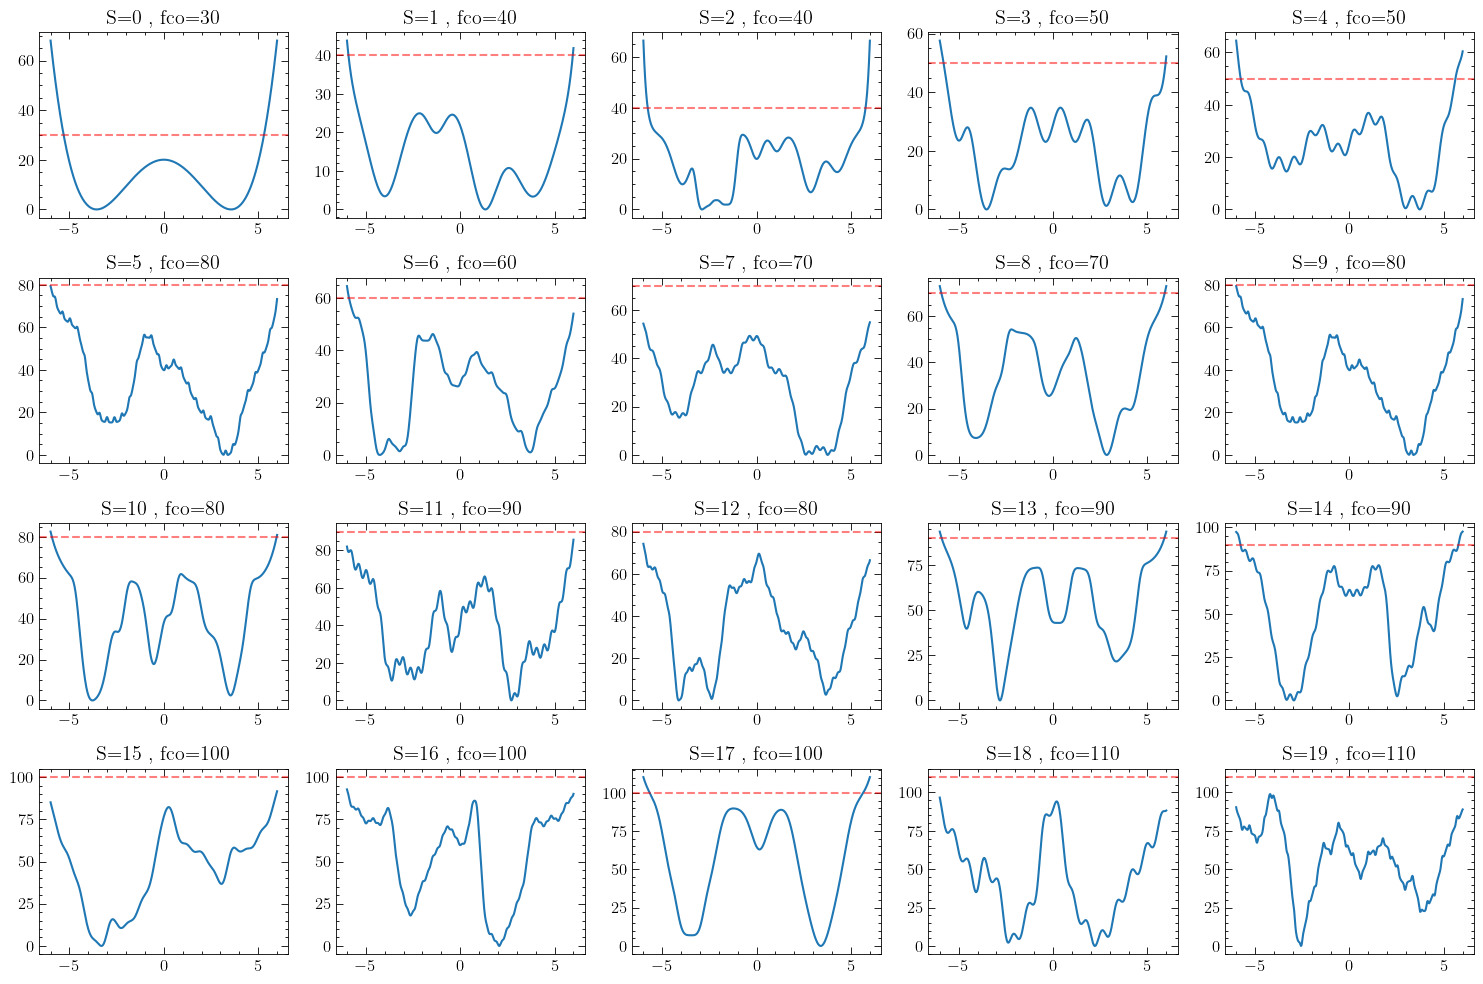

In [4]:
### plot all surfaces

y_list = [y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12, y13, y14, y15, y16, y17, y18, y19]
FES_cutoff_list_old = [30, 40, 40, 50, 50, 80, 60, 70, 70, 80, 80, 90, 80, 90, 90, 100, 100, 100, 110, 110]

plt.figure(figsize=(15, 10))
for n_surf in range(20):
    plt.subplot(4, 5, n_surf+1)
    plt.plot(grid, y_list[n_surf])
    plt.axhline(FES_cutoff_list_old[n_surf], color='red', linestyle='--', alpha=0.5); plt.title(f"S={n_surf} , fco={FES_cutoff_list_old[n_surf]}")
plt.tight_layout(); plt.show()

#### Next